In [66]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import ray
from ray.rllib.algorithms import ppo
from ray.tune.logger import pretty_print
import trading_env

In [67]:
ray.shutdown()
ray.init()

2024-07-08 16:29:24,832	INFO worker.py:1771 -- Started a local Ray instance.


Python version:,3.12.4
Ray version:,2.31.0


In [68]:
algo = ppo.PPO(env=trading_env.TradingEnv, config={"env_config": {
    "render_mode" : None,
    "memory_length" : 30,
    "episode_length" : 90,
    "step_discount" : trading_env.annual_to_daily_discount(0.98),
}})

results = []

for i in range(10):
    print(f"Training episode batch {i}")
    results.append(algo.train())
    # print(pretty_print(results[-i]))
    if i % 10 == 0:
        checkpoint_dir = algo.save().checkpoint.path
        print(f"Checkpoint after trial {i} saved in directory {checkpoint_dir}")

2024-07-08 16:29:28,723	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='<class 'trading_env.TradingEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class 'trading_env.TradingEnv'>').build()` instead. This will raise an error in the future!
2024-07-08 16:29:39,330	INFO trainable.py:161 -- Trainable.setup took 10.597 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2024-07-08 16:29:39,333	WARNING util.py:61 -- Install gputil for GPU system monitoring.


(pid=30240) WARNING:tensorflow:From c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\ray\rllib\utils\framework.py:126: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.
(pid=30240) 
(pid=27392) 


Training episode 0
Checkpoint after trial 0 saved in directory C:\Users\brand\AppData\Local\Temp\tmpbp0v27m2
Training episode 1
Training episode 2
Training episode 3
Training episode 4
Training episode 5
Training episode 6
Training episode 7
Training episode 8
Training episode 9
Training episode 10
Checkpoint after trial 10 saved in directory C:\Users\brand\AppData\Local\Temp\tmp0jtvh5ly
Training episode 11
Training episode 12
Training episode 13
Training episode 14
Training episode 15
Training episode 16
Training episode 17
Training episode 18
Training episode 19
Training episode 20
Checkpoint after trial 20 saved in directory C:\Users\brand\AppData\Local\Temp\tmpldkc7oi4
Training episode 21
Training episode 22
Training episode 23
Training episode 24
Training episode 25
Training episode 26
Training episode 27
Training episode 28
Training episode 29
Training episode 30
Checkpoint after trial 30 saved in directory C:\Users\brand\AppData\Local\Temp\tmpwn6opcz0
Training episode 31
Trainin

In [71]:
checkpoint_dir = algo.save().checkpoint.path
print(pretty_print(results[-1]))
print(f"Checkpoint after trial {i} saved in directory {checkpoint_dir}")

agent_timesteps_total: 400000
counters:
  num_agent_steps_sampled: 400000
  num_agent_steps_trained: 400000
  num_env_steps_sampled: 400000
  num_env_steps_trained: 400000
custom_metrics: {}
date: 2024-07-08_17-04-23
done: false
env_runners:
  connector_metrics:
    ObsPreprocessorConnector_ms: 0.001997709274291992
    StateBufferConnector_ms: 0.003997802734375
    ViewRequirementAgentConnector_ms: 0.13492822647094727
  custom_metrics: {}
  episode_len_mean: 90.0
  episode_media: {}
  episode_return_max: 129.81050350495687
  episode_return_mean: 82.49638031264871
  episode_return_min: -12.534649350996077
  episode_reward_max: 129.81050350495687
  episode_reward_mean: 82.49638031264871
  episode_reward_min: -12.534649350996077
  episodes_this_iter: 44
  episodes_timesteps_total: 9000
  hist_stats:
    episode_lengths: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
      90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
      90, 90, 90, 90, 90, 90

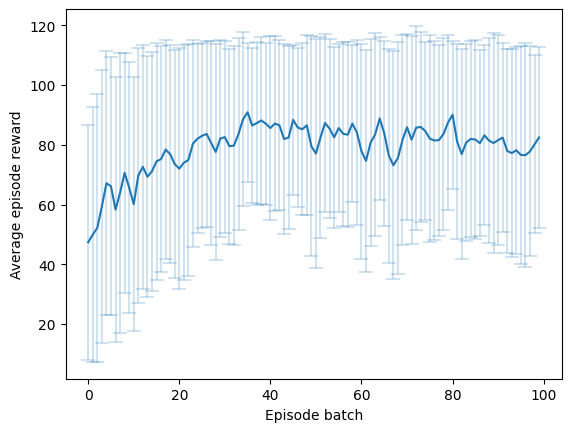

In [72]:
import numpy as np
from matplotlib import pyplot as plt

reward_mean = [np.mean(results[i]["env_runners"]["hist_stats"]["episode_reward"]) for i in range(len(results))]
reward_stde = [np.std(results[i]["env_runners"]["hist_stats"]["episode_reward"]) for i in range(len(results))]
plt.errorbar(np.arange(len(reward_mean)), reward_mean, reward_stde,
             capsize=5, elinewidth=0.3, capthick=0.3)
plt.xlabel("Episode batch")
plt.ylabel("Average episode reward")
plt.show()